## Mini Project 2: Gas-Liquid lattice model

In [261]:
import numpy as np
#import random
import matplotlib.pyplot as plt
from scipy.special import binom
import os
from datetime import datetime


    

In [262]:
current_dir = os.getcwd()

new_dir = f'{current_dir}/Data/'

file_name = '20231117-22-29_run10000.npz'
file_dir = f'{new_dir}{file_name}'

npzfile = np.load(file_dir)

keys = npzfile.files
for key in keys:
    locals()[key] = npzfile[key]
    
print(keys)

['T', 'density', 'E_mean', 'E_variance', 'num_runs', 'MinLatticeSize', 'eps', 'execution_time']


In [263]:
E_var = E_variance

In [407]:
def stirling(x):
    res = x*np.log(x)-x
    return res

def multiplicity(MinLatticeSize, density, d_max):
    n = MinLatticeSize**2*d_max
    N = n/density
    multiplicity = stirling(N)-stirling(n)-stirling(N-n)
    
    num_particles = N
    return num_particles, multiplicity

def the_physics(temperature, density, E_mean, E_var, M):
    
    S_ref = np.log(M)
    Sgrad = np.zeros([len(temperature), len(density)])
    Svar = np.zeros([len(temperature), len(density)])
    
    Cv_gradient = np.zeros([len(temperature), len(density)])
    Cv_variance = np.zeros([len(temperature), len(density)])
    for d in range(len(density)):
        Cv_gradient[:,d] = np.gradient(E_mean[:,d],temperature)
        for i in range(len(temperature)):
            Cv_variance[i,d] = E_var[i,d]/temperature[i]**2
            
        Sgrad[:,d] = S_ref - np.cumsum(Cv_gradient[:,d])
        Svar[:,d] = S_ref - np.cumsum(Cv_variance[:,d])
        F[:,d] = E_mean[:,d] - temperature*Sgrad[:,d]
    
    return Cv_gradient, Cv_variance, Sgrad, Svar, F

Cv_grad, Cv_var, Sgrad, Svar, F =the_physics(T, density, E_mean, E_var, M)


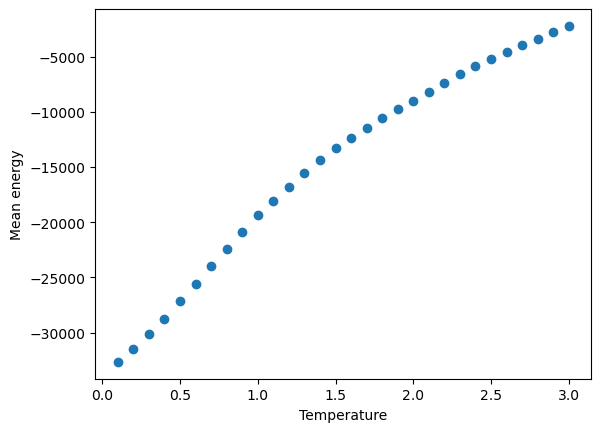

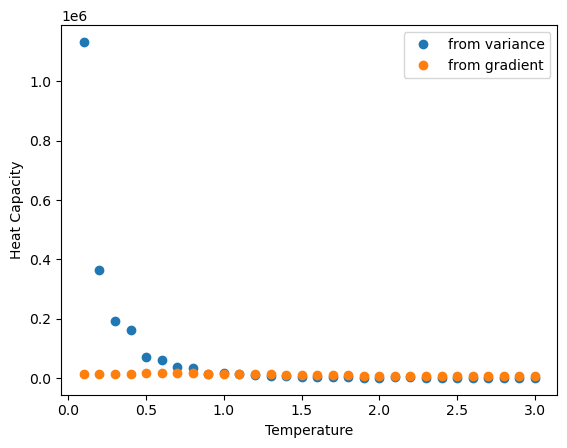

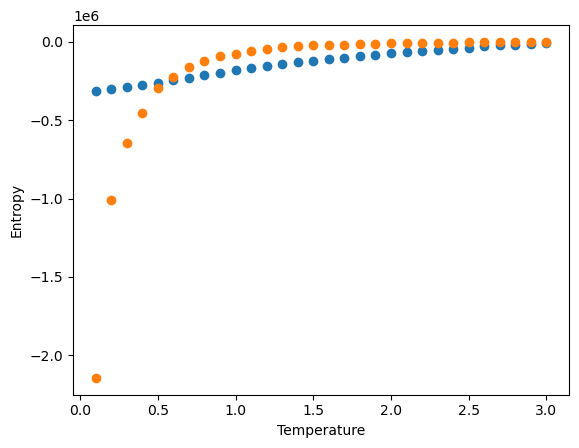

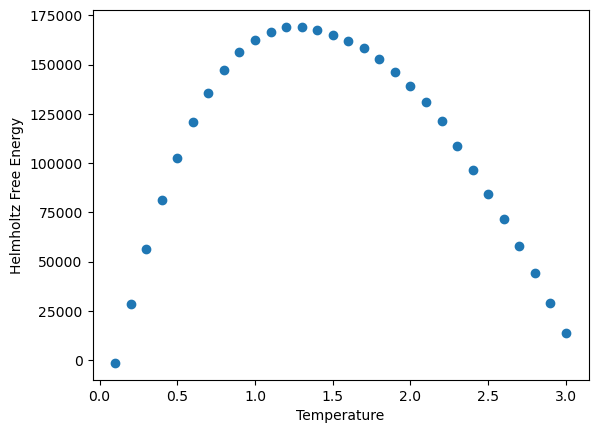

In [414]:
d = 5

plt.figure()
plt.plot(T,E_mean[:,d],'o')
plt.xlabel('Temperature')
plt.ylabel('Mean energy')
#plt.title('Mean Energy')
plt.show()

plt.figure()
plt.plot(T,Cv_var[:,d],'o', label = 'from variance' )
plt.plot(T,Cv_grad[:,d],'o', label = 'from gradient' )
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.legend()
#plt.title('Heat Capacity')
plt.show()

plt.figure()
plt.plot(T,Sgrad[:,d],'o', label = 'from variance' )
plt.plot(T,Svar[:,d],'o', label = 'from gradient' )
plt.xlabel('Temperature')
plt.ylabel('Entropy')
#plt.title('Entropy')
plt.show()

plt.figure()
plt.plot(T,F[:,d],'o', )
plt.xlabel('Temperature')
plt.ylabel('Helmholtz Free Energy')
#plt.title('Entropy')
plt.show()

In [322]:
# showing lattices as they evolve 

def lattice_plots(lattice_history, selected_indices):

    cmap = plt.get_cmap("binary", 2)

    for i in [0,len(lattice_history)-1]:

        # Create a plot
        plt.matshow(lattice_history[i], cmap=cmap)
       # plt.xticks(range(lattice.shape[1]))
        #plt.yticks(range(lattice.shape[0]))

        plt.grid(visible=False)

        plt.title(f"Lattice at Iteration {selected_indices[i]}")  # Add a title with the iteration number

        fig_name = f"Plot\Lattice_iter{selected_indices[i]}"
       # plt.savefig(fig_name)
        plt.show()

In [228]:
def energy_history_plot(T, E_history, size, ratio, num_runs):
    yMin = min(E_history[len(T)-1])-4
    yMax = max(E_history[0])

    # Create subplots
    fig, axes = plt.subplots(len(T), 1, figsize=(8, 2*len(T)))
    fig.suptitle(f'{size} by {size}, density={ratio}')

    for i in range(len(T)):
        ax = axes[i]

        T_formatted = f'{T[i]:.2f}'
        ax.plot(np.arange(0, num_runs), E_history[i], '.', markersize = '1')
        ax.set_yticks(np.arange(yMin, yMax, step = 20))
        ax.set_ylabel(f'Energy (T = {T_formatted})')
        #ax.set_xlabel('Iteration')
        #ax.set_title()

    #plt.tight_layout()
    #plt.savefig('Runs_data/1e6_100x100.svg', format ='svg')
    plt.show()
    
#energy_history_plot(T, E_history, size, ratio, num_runs)

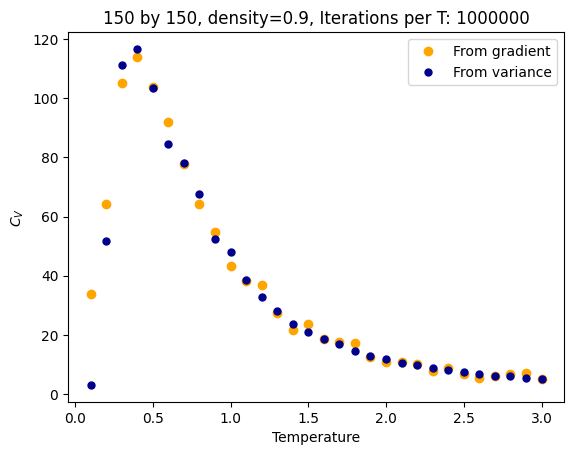

In [130]:

   
plt.figure()
plt.plot(T,Cv_grad,'o', color = 'orange', label = 'From gradient')
plt.plot(T,Cv_var, '.', markersize = '10', color = 'darkblue', label = 'From variance')
plt.xlabel('Temperature')
plt.ylabel('$C_{V}$')
plt.title(f'{size} by {size}, density={ratio}, Iterations per T: {num_runs}')
plt.legend()
#plt.savefig(f'Runs_data/{datetime_str}Cv.png')
plt.show()


Now get the Pressure and evaluate the critical temperature for each density. 

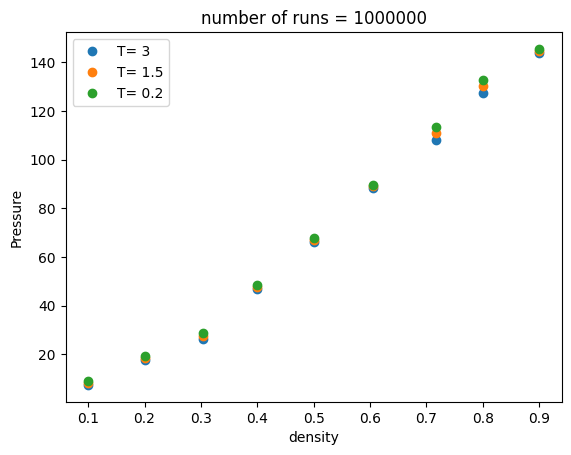

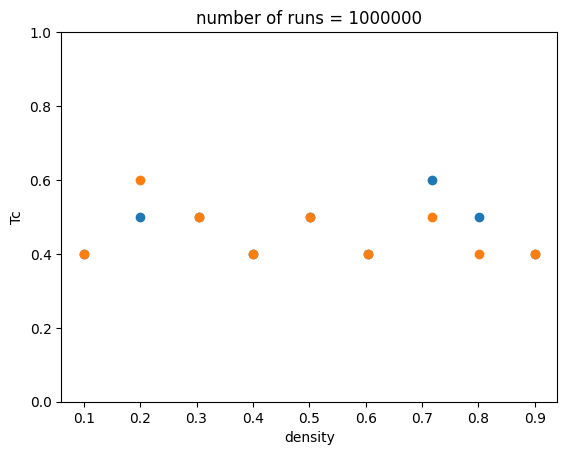

In [194]:
def Extract(lst, index):
    return [item[index] for item in lst]
  
def Max_index_extract(lst): ###get the index of max value of a list of lists
    index_list =[]
    for list in lst:
        max_list = np.argmax(list)
        index_list.append( max_list )
    return index_list

P= - np.gradient(Extract(F_list,0),size_list)
P2= - np.gradient(Extract(F_list,15),size_list)
P3= - np.gradient(Extract(F_list,28),size_list)

Tc_list =[]
for Tc_index in Max_index_extract(Cv_grad_list) :
    Tc_list.append(T[Tc_index])
Tc_list2=[]
for Tc_index in Max_index_extract(Cv_var_list) :
    Tc_list2.append(T[Tc_index])
    
plt.figure()
plt.plot(density_list,-P,'o')
plt.plot(density_list,-P2,'o')
plt.plot(density_list,-P3,'o')
plt.xlabel('density')
plt.ylabel('Pressure')
plt.legend(['T= 3','T= 1.5','T= 0.2'])
plt.title(f'number of runs = {num_runs}')

plt.show()

index_Temp =[]

plt.figure()
plt.plot( density_list,Tc_list,'o')
plt.plot( density_list,Tc_list2,'o')
plt.xlabel('density')
plt.ylabel('Tc')
plt.title(f'number of runs = {num_runs}')
plt.ylim(0,1)

plt.show()


By the graphs it becomes visible that the pressure is more intense for higher densities, as expected. 

### Heat Capacity Polynomial Fitting

        9         8         7        6        5        4         3
-4.917 x + 69.57 x - 410.2 x + 1295 x - 2319 x + 2215 x - 735.5 x
          2
 - 433.2 x + 369.9 x - 32.24


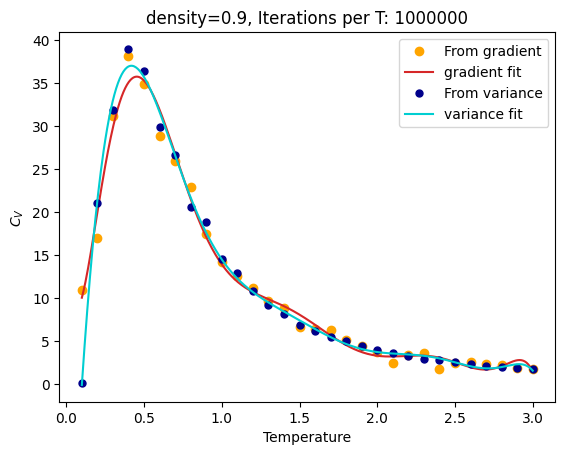

         9         8         7         6         5         4         3
0.02083 x + 1.305 x - 17.09 x + 77.93 x - 141.5 x - 20.16 x + 475.4 x
          2
 - 703.7 x + 375.1 x - 30.33


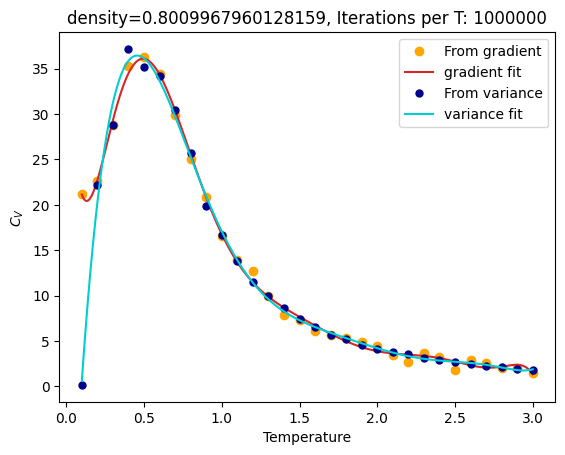

       9         8        7        6             5             4
-28.4 x + 424.9 x - 2699 x + 9471 x - 1.998e+04 x + 2.579e+04 x
              3        2
 - 1.974e+04 x + 8165 x - 1478 x + 101.3


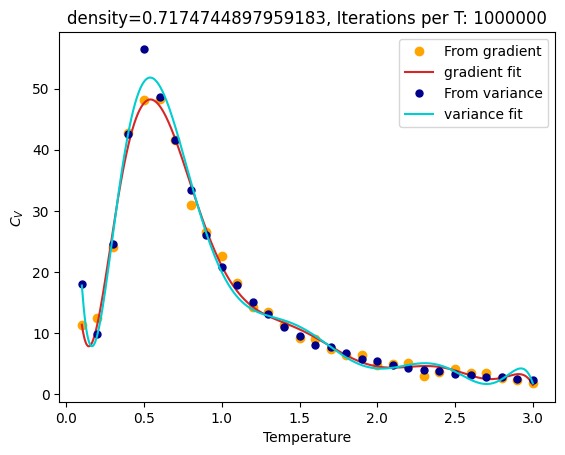

        9         8        7        6             5             4
-26.74 x + 387.7 x - 2372 x + 7940 x - 1.576e+04 x + 1.872e+04 x
              3        2
 - 1.262e+04 x + 4121 x - 370 x + 4.502


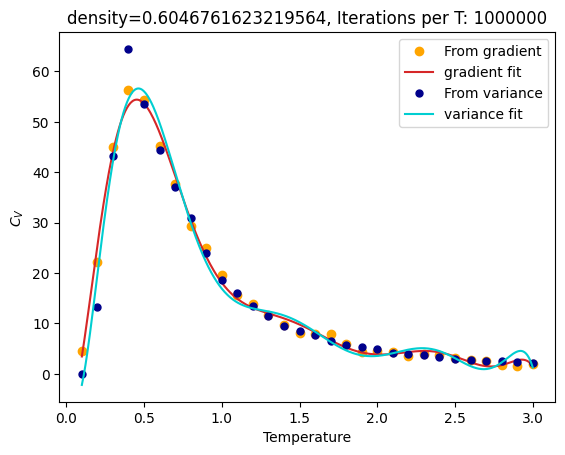

        9         8        7        6        5             4        3
-13.96 x + 206.4 x - 1290 x + 4419 x - 8984 x + 1.089e+04 x - 7386 x
         2
 + 2254 x - 66.83 x - 10.14


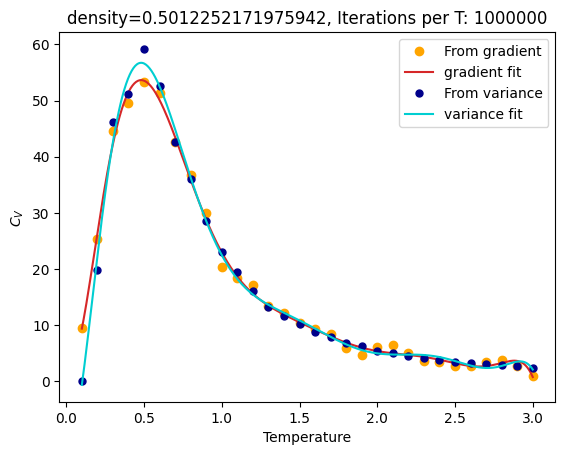

        9         8        7        6             5             4
-23.86 x + 341.3 x - 2051 x + 6709 x - 1.289e+04 x + 1.455e+04 x
         3        2
 - 8955 x + 2298 x + 58.08 x - 20.69


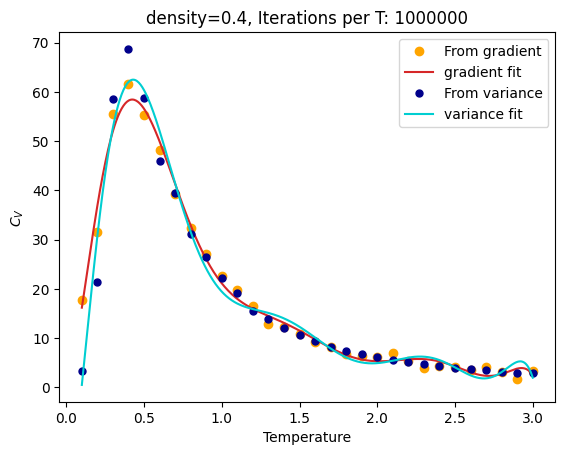

        9         8        7             6             5             4
-39.34 x + 580.6 x - 3627 x + 1.246e+04 x - 2.558e+04 x + 3.177e+04 x
              3        2
 - 2.294e+04 x + 8523 x - 1183 x + 53.05


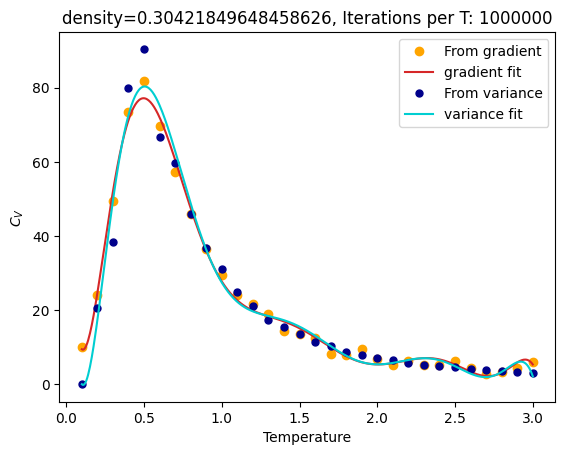

        9       8         7        6        5             4        3
-9.132 x + 145 x - 976.9 x + 3627 x - 8037 x + 1.069e+04 x - 8046 x
         2
 + 2816 x - 178.9 x + 3.514


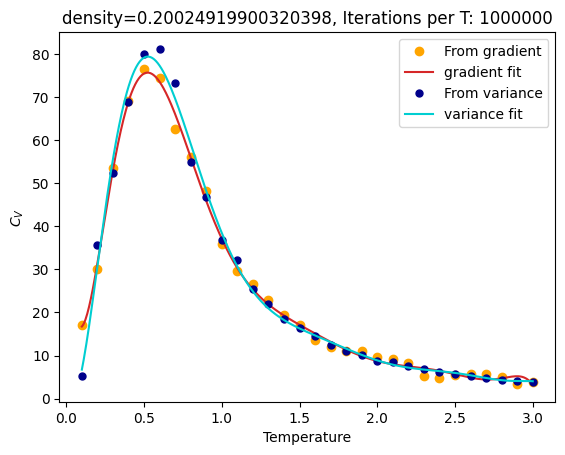

        9         8        7        6        5        4        3
-17.76 x + 247.9 x - 1439 x + 4464 x - 7837 x + 7331 x - 2390 x
         2
 - 1359 x + 1143 x - 99.62


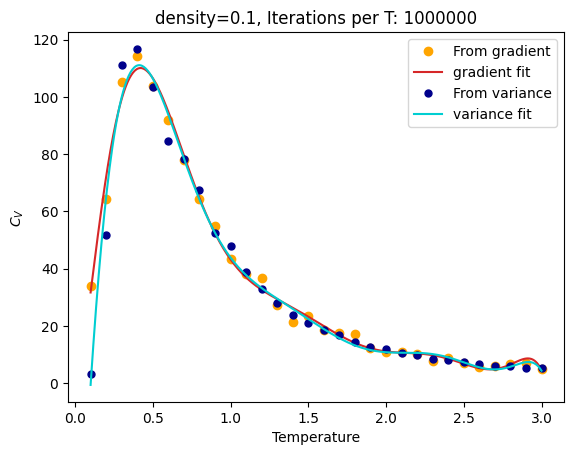

In [141]:
p_grad_list = []
p_var_list = []
xp = np.linspace(min(T), max(T), 500)
for run_idx in range(len(Cv_grad_list)):
    
    p_grad = np.poly1d(np.polyfit(T, Cv_grad_list[run_idx],  9))
    p_grad_list.append(p_grad)
    p_var = np.poly1d(np.polyfit(T, Cv_var_list[run_idx],  9))
    p_var_list.append(p_var)
    
    print(p_var)
    
    plt.figure()
    plt.plot(T, Cv_grad_list[run_idx], 'o', color = 'orange', label = 'From gradient')
    plt.plot(xp, p_grad(xp), color='C3', label = 'gradient fit')
    plt.plot(T, Cv_var_list[run_idx], '.', markersize=10, color = 'darkblue', label = 'From variance')
    plt.plot(xp, p_var(xp), color = 'darkturquoise', label = 'variance fit')
    plt.xlabel('Temperature')
    plt.ylabel('$C_{V}$')
    plt.title(f'density={density_list[run_idx]}, Iterations per T: {num_runs}')
    plt.legend()
    plt.show()

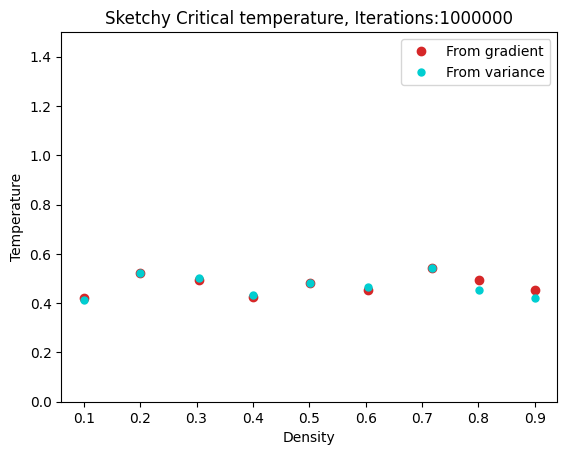

In [145]:
Tc_gradSketchy_list = []
Tc_varSketchy_list = []
for run_idx in range(len(Cv_grad_list)):
    
    # Sketchy
    Tc_gradSketchy, Tc_gradSketchy_index = critical_temperature(p_grad_list[run_idx](xp), xp)
    Tc_gradSketchy_list.append(Tc_gradSketchy)
    
    Tc_varSketchy, Tc_varSketchy_index = critical_temperature(p_var_list[run_idx](xp), xp)
    Tc_varSketchy_list.append(Tc_varSketchy)
    
plt.figure()
plt.plot(density_list, Tc_gradSketchy_list, 'o', color = 'C3', label = 'From gradient')
plt.plot(density_list, Tc_varSketchy_list, '.', markersize = '10', color = 'darkturquoise', label = 'From variance')
plt.ylim(0, 1.5)
plt.xlabel('Density')
plt.ylabel('Temperature')
plt.legend()
plt.title(f'Sketchy Critical temperature, Iterations:{num_runs}')
plt.show()